In [ ]:
%load_ext autoreload
%autoreload 2

from nbdev import *
from fastcore.test import *
from fastai2.vision.all import *
import pandas as pd
%nbdev_default_export bbox_dblock_ex

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Cells will be exported to rory.bbox_dblock_ex,
unless a different module is specified after an export flag: `%nbdev_export special.module`


# This notebook explores setting up a pipeline for Bbox data
> :)

## Fastai examples from the docs

### Demonstrating transformations with COCO_TINY
> `Datasets(src, [f,f,f])` –> `TfmdDL(ds, after_item=[], after_batch=[])`

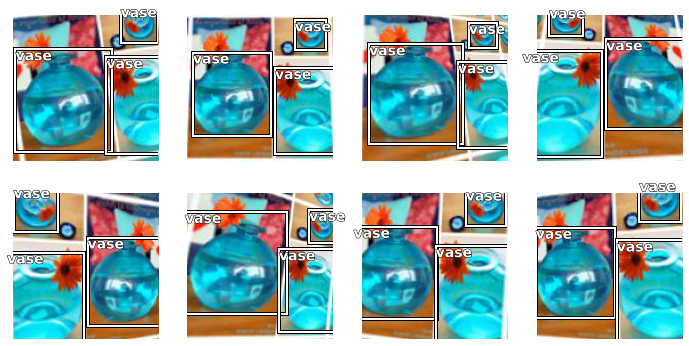

In [ ]:
coco = untar_data(URLs.COCO_TINY)                     # grabbed data
images, lbl_bbox = get_annotations(coco/'train.json') # unpack annotations
idx=2
coco_fn,bbox = coco/'train'/images[idx],lbl_bbox[idx] # assign img and annos: (bboxes::LoL, labels::list)

def _coco_bb(x):  return TensorBBox.create(bbox[0])   # return tensor of bboxes::LoL
def _coco_lbl(x): return bbox[1]                      # return label::L

coco_dsrc = Datasets([coco_fn]*10,       # src::list
                     [PILImage.create,   # [img, bbs, labels]
                      [_coco_bb],
                      [_coco_lbl, MultiCategorize(add_na=True)]],
                     n_inp=1)

coco_tdl = TfmdDL(coco_dsrc, bs=8,
                  after_item=[BBoxLabeler(), PointScaler(), ToTensor()],
                  after_batch=[IntToFloatTensor(), *aug_transforms()])

coco_tdl.show_batch()

In [ ]:
doc(Transform)

In [ ]:
coco_tdl.tfms

(#3) [Pipeline: PILBase.create,Pipeline: _coco_bb,Pipeline: _coco_lbl -> MultiCategorize -- {'vocab': (#2) ['#na#','vase'], 'add_na': True}]

#### Breakdown

In [ ]:
coco = untar_data(URLs.COCO_TINY);                       #coco

In [ ]:
images, lbl_bbox = get_annotations(coco/'train.json');   #print([images[0]]); [lbl_bbox[0]]

In [ ]:
idx=2

In [ ]:
coco_fn,bbox = coco/'train'/images[idx],lbl_bbox[idx];   #print(coco_fn); bbox

In [ ]:
def _coco_bb(x):  return TensorBBox.create(bbox[0])      #print(_coco_bb(1)); print(_coco_bb(2))
def _coco_lbl(x): return bbox[1]                         #print(_coco_lbl(1)); print(_coco_lbl(2))

In [ ]:
coco_dsrc = Datasets([coco_fn]*10,                        # 10 identical paths
                     [PILImage.create,                    # 10 identical imgs
                      [_coco_bb],                         # 10 identical bboxes
                      [_coco_lbl, MultiCategorize(add_na=True)]], # ... and lbls
                     n_inp=1)

In [ ]:
coco_tdl = TfmdDL(coco_dsrc, bs=2,
                  after_item=[BBoxLabeler(), PointScaler(), ToTensor()],
                  after_batch=[IntToFloatTensor(), *aug_transforms()])

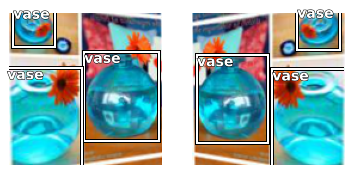

In [ ]:
coco_tdl.show_batch()

In [ ]:
coco_tdl.one_batch()

(TensorImage([[[[0.7310, 0.6286, 0.6702,  ..., 0.9830, 0.9975, 0.9875],
           [0.4801, 0.2736, 0.3275,  ..., 1.0000, 0.9998, 0.9988],
           [0.4186, 0.1593, 0.2124,  ..., 1.0000, 0.9903, 0.9742],
           ...,
           [0.7095, 0.6798, 0.8940,  ..., 0.1434, 0.1699, 0.1932],
           [0.7324, 0.6885, 0.9007,  ..., 0.0759, 0.1317, 0.1859],
           [0.7229, 0.6801, 0.8940,  ..., 0.0452, 0.0971, 0.1704]],
 
          [[0.7956, 0.6918, 0.7060,  ..., 0.8727, 0.8546, 0.8381],
           [0.5648, 0.3631, 0.3925,  ..., 0.9653, 0.9568, 0.9614],
           [0.5051, 0.2641, 0.2998,  ..., 0.9862, 0.9808, 0.9824],
           ...,
           [0.3904, 0.4441, 0.8090,  ..., 0.9128, 0.9107, 0.9314],
           [0.3735, 0.4109, 0.7804,  ..., 0.9544, 0.9758, 0.9849],
           [0.3526, 0.3789, 0.7455,  ..., 0.9645, 0.9834, 0.9878]],
 
          [[0.8685, 0.7786, 0.7826,  ..., 0.7743, 0.7645, 0.7583],
           [0.6734, 0.4924, 0.5164,  ..., 0.9220, 0.9377, 0.9612],
           [0.6292,